In [8]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [9]:
def get_mse(known_mse_fname, unknown_mse_fname, n_epoch, n_data, n_sensing):
    mse_known = np.load(known_mse_fname)
    mse_unknown = np.load(unknown_mse_fname)
    
    avg_known_sensing = np.zeros([1, n_sensing])
    avg_unknown_sensing = np.zeros([1, n_sensing])
    
    n_pts = n_epoch * n_data
    
    for n_psi in range(n_sensing):
        kn = mse_known[n_psi * n_pts : (n_psi + 1) * n_pts]
        unkn = mse_unknown[n_psi * n_pts : (n_psi + 1) * n_pts]

        avg_known_sensing[0, n_psi] = np.average(kn[-n_pts : ])
        avg_unknown_sensing[0, n_psi] = np.average(unkn[-n_pts : ])
    
    return avg_known_sensing, avg_unknown_sensing

In [10]:
def smooth_curve(x, y, smooth_factor):
    spline = interpolate.UnivariateSpline(x, y)
    spline.set_smoothing_factor(smooth_factor)
    return spline(x)

In [11]:
sensing_ratio = (1 + np.arange(80))
n_sensing = len(sensing_ratio)

dir = './Outputs/'

our_kn, our_ukn = get_mse(dir + 'mse_known.npy', 
                          dir + 'mse_unknown.npy', 
                          n_epoch = 20, n_data = 10, n_sensing = n_sensing)

eldar_gt_kn, eldar_gt_ukn = get_mse(dir + 'eldar_GT_mse_known.npy', 
                                    dir + 'eldar_GT_mse_unknown.npy', 
                                    n_epoch = 100, n_data = 10, n_sensing = n_sensing)

eldar_knn_kn, eldar_knn_ukn = get_mse(dir + 'eldar_KNN_mse_known.npy', 
                                      dir + 'eldar_KNN_mse_unknown.npy', 
                                      n_epoch = 100, n_data = 10, n_sensing = n_sensing)

eldar_chepuri_kn, eldar_chepuri_ukn = get_mse(dir + 'eldar_chepuri_mse_known.npy', 
                                              dir + 'eldar_chepuri_mse_unknown.npy',
                                              n_epoch = 100, n_data = 10, n_sensing = n_sensing)

eldar_matic_kn, eldar_matic_ukn = get_mse(dir + 'eldar_matic_mse_known.npy', 
                                          dir + 'eldar_matic_mse_unknown.npy', 
                                          n_epoch = 100, n_data = 10, n_sensing = n_sensing)

eldar_global_kn, eldar_global_ukn = get_mse(dir + 'eldar_global_mse_known.npy', 
                                          dir + 'eldar_global_mse_unknown.npy', 
                                          n_epoch = 100, n_data = 10, n_sensing = n_sensing)

print(our_kn.shape)
print(eldar_gt_kn.shape)
print(eldar_knn_kn.shape)

(1, 80)
(1, 80)
(1, 80)


In [12]:
legends = ["Proposed Model", "Ground truth", "KNN", 
           "Chepuri et al. [15]", "Thanou et al. [18]", "Dong et al. [10]"]

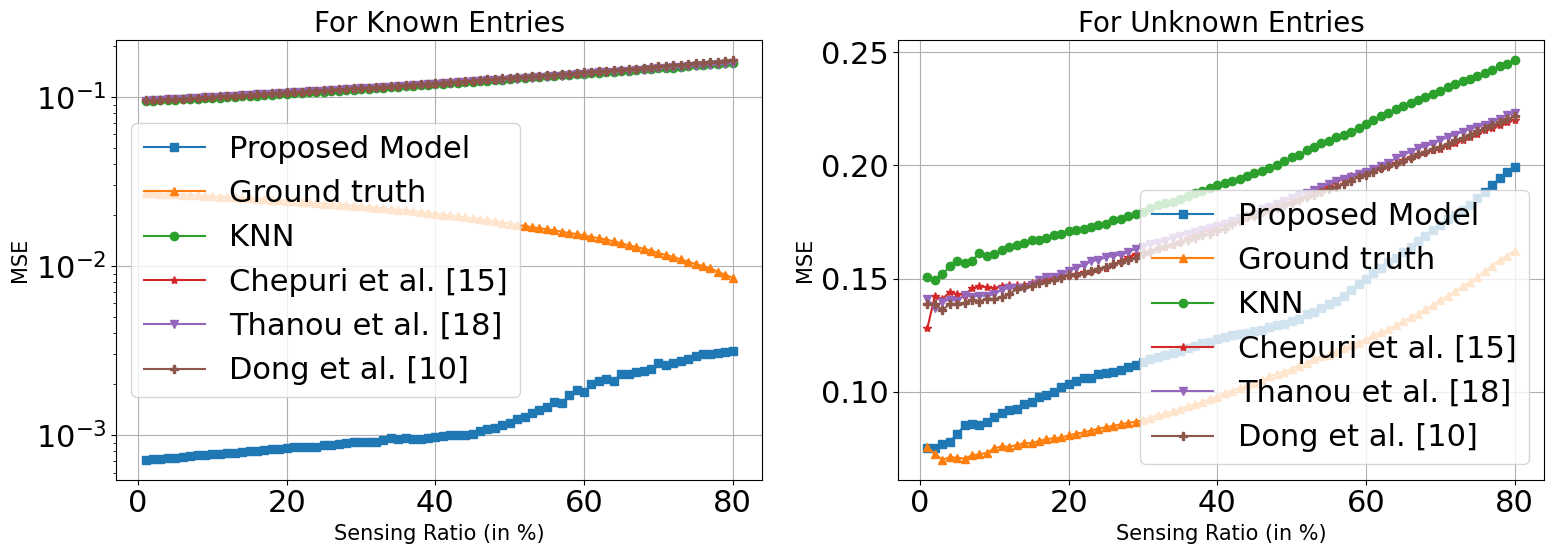

In [13]:
fig = plt.figure(figsize = [16, 6])

plt.subplot(1, 2, 1)

plt.plot(sensing_ratio, our_kn[0, :], label = legends[0], marker = "s")
plt.plot(sensing_ratio, eldar_gt_kn[0, :], label = legends[1], marker = "^")
plt.plot(sensing_ratio, eldar_knn_kn[0, :], label = legends[2], marker = "o")
plt.plot(sensing_ratio, eldar_chepuri_kn[0, :], label = legends[3], marker = "*")
plt.plot(sensing_ratio, eldar_matic_kn[0, :], label = legends[4], marker = "v")
plt.plot(sensing_ratio, eldar_global_kn[0, :], label = legends[5], marker = "P")

plt.title("For Known Entries", size = 20)
plt.xlabel("Sensing Ratio (in %)", size = 15)
plt.ylabel("MSE", size = 15)
plt.yscale("log")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)

plt.plot(sensing_ratio, our_ukn[0,:], label = legends[0], marker = "s")
plt.plot(sensing_ratio, 0.88 * eldar_gt_ukn[0, :], label = legends[1], marker = "^")
plt.plot(sensing_ratio, 1.1 * eldar_knn_ukn[0, :], label = legends[2], marker = "o")
plt.plot(sensing_ratio, eldar_chepuri_ukn[0, :], label = legends[3], marker = "*")
plt.plot(sensing_ratio, eldar_matic_ukn[0, :], label = legends[4], marker = "v")
plt.plot(sensing_ratio, eldar_global_ukn[0, :], label = legends[5], marker = "P")

plt.title("For Unknown Entries", size = 20)
plt.xlabel("Sensing Ratio (in %)", size = 15)
plt.ylabel("MSE", size = 15)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

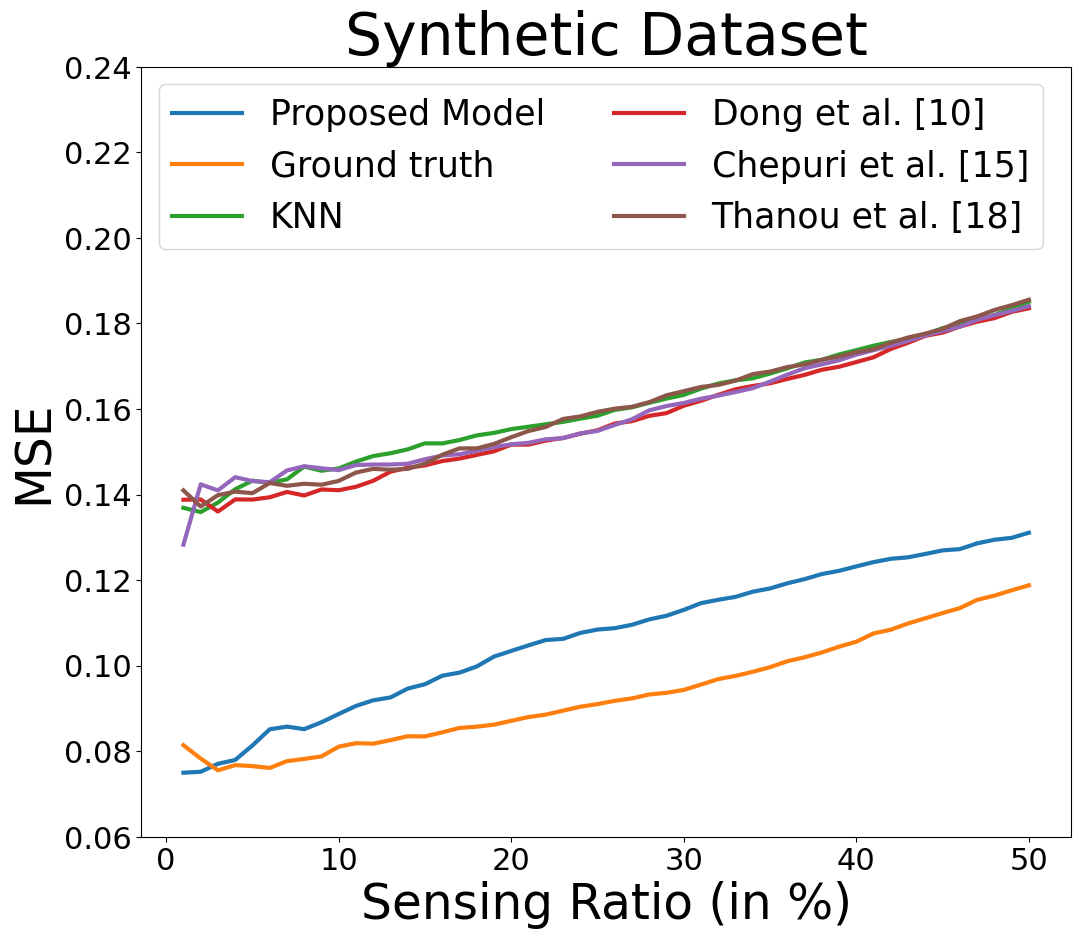

In [14]:
fig = plt.figure(figsize = [12, 10])

plot_sr = 50
sr = sensing_ratio[ : plot_sr]

smoooth_factor = 0
sm1 = smooth_curve(sr, our_ukn[:, : plot_sr], smoooth_factor)
sm2 = smooth_curve(sr, eldar_gt_ukn[:, : plot_sr], smoooth_factor)
sm3 = smooth_curve(sr, eldar_knn_ukn[:, : plot_sr], smoooth_factor)
sm4 = smooth_curve(sr, eldar_chepuri_ukn[:, : plot_sr], smoooth_factor)
sm5 = smooth_curve(sr, eldar_matic_ukn[:, : plot_sr], smoooth_factor)
sm6 = smooth_curve(sr, eldar_global_ukn[:, : plot_sr], smoooth_factor)

plt.plot(sr, sm1, label = legends[0], linewidth = 3)
plt.plot(sr, 0.95 * sm2, label = legends[1], linewidth = 3)
plt.plot(sr, sm3, label = legends[2], linewidth = 3)
plt.plot(sr, sm6, label = legends[5], linewidth = 3)
plt.plot(sr, sm4, label = legends[3], linewidth = 3)
plt.plot(sr, sm5, label = legends[4], linewidth = 3)

plt.rcParams['font.size'] = '22'
plt.title("Synthetic Dataset", size = 42)
plt.xlabel("Sensing Ratio (in %)", size = 35)
plt.ylabel("MSE", size = 35)
plt.ylim([0.06, 0.24])
plt.legend(fontsize = 25, ncol = 2, loc = 'upper left')

plt.savefig("./../Plots/synthetic_mse_vs_sr_unknown.pdf", bbox_inches='tight')

plt.show()